In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering

In [59]:
total = pd.read_csv(r'C:\Users\utw09\Desktop\정노을\본캠 프로젝트\final\final_data(ver.3)(24.04.18).csv', index_col=0)

In [60]:
updated_columns = [
    'Review_score', 'Review_counts', 'slope',
    'bread', 'beverage', 'vegan', 'no_senior', 'no_kids', 'pet', 'whole_wheat',
    'view', 'atmosphere', 'friendly', 'clean_store', 'restroom_clean', 'parking',
    'spacious_store', 'plenty_seats', 'comfortable_seats', 'special_menu', 'photo',
    'good_music', 'reservation_possible', 'unique_concept', 'beautiful_interior',
    'price', 'wait', 'health', 'sentiment'
]

# total 데이터 프레임에서 업데이트된 칼럼만 선택하여 새로운 데이터 프레임 생성
data_br = total[updated_columns]

# MinMax Scaler

In [37]:
# MinMaxScaler
scaler = MinMaxScaler()

# 스케일링을 적용할 칼럼 선택
columns_to_scale = data_br.columns

# 선택한 칼럼에 대해 스케일링 적용
scaled_data = pd.DataFrame(scaler.fit_transform(data_br[columns_to_scale]), columns=columns_to_scale)
scaled_data

Review_score  Review_counts     slope  bread  beverage  vegan  \
0          0.766667       0.016491  0.000000   0.50      0.50    0.5   
1          0.766667       0.016491  0.000000   0.55      1.00    0.5   
2          0.766667       0.016491  0.000000   0.50      0.25    0.5   
3          0.766667       0.016491  0.000000   0.50      0.50    0.5   
4          0.766667       0.016491  0.000000   0.55      0.50    0.5   
...             ...            ...       ...    ...       ...    ...   
15222      0.800000       0.001882  0.192072   0.75      0.50    0.5   
15223      0.800000       0.001882  0.192072   1.00      1.00    0.5   
15224      0.800000       0.001882  0.192072   0.75      0.50    0.5   
15225      0.800000       0.001882  0.192072   0.75      0.50    0.5   
15226      0.800000       0.001882  0.192072   0.50      0.50    0.5   

       no_senior  no_kids  pet  whole_wheat  ...  special_menu  photo  \
0            0.5      0.5  0.5     0.333333  ...           0.0    0.5   
1            0.5      0.5  0.5     0.333333  ...           0.0    0.5   
2            0.5      0.5  0.5     0.333333  ...           0.0    0.5   
3            0.5      0.5  0.5     0.333333  ...           0.0    0.5   
4            0.5      0.5  0.5     0.333333  ...           0.0    0.5   
...          ...      ...  ...          ...  ...           ...    ...   
15222        0.5      0.5  0.5     0.333333  ...           0.0    0.5   
15223        0.5      0.5  0.5     0.333333  ...           0.0    0.5   
15224        0.5      0.5  0.5     0.333333  ...           0.0    0.5   
15225        0.5      0.5  0.5     0.333333  ...           0.0    0.5   
15226        0.5      0.5  0.5     0.333333  ...           0.0    0.5   

       good_music  reservation_possible  unique_concept  beautiful_interior  \
0             0.5                   0.5             0.0            0.333333   
1             0.5                   0.5             0.0            0.333333   
2             0.5                   0.5             0.0            0.333333   
3             0.5                   0.5             0.0            0.333333   
4             0.5                   0.5             0.0            1.000000   
...           ...                   ...             ...                 ...   
15222         0.5                   0.5             0.0            0.333333   
15223         0.5                   0.5             0.0            0.333333   
15224         0.5                   0.5             0.0            0.333333   
15225         0.5                   0.5             0.0            0.333333   
15226         0.5                   0.5             0.0            0.333333   

       price  wait  health  sentiment  
0       0.50   0.5     0.5        1.0  
1       0.50   0.5     0.5        1.0  
2       0.50   0.5     0.5        0.0  
3       0.50   0.5     0.5        1.0  
4       1.00   0.5     0.5        1.0  
...      ...   ...     ...        ...  
15222   0.50   0.5     0.5        1.0  
15223   0.50   0.5     0.5        1.0  
15224   0.75   0.5     0.5        1.0  
15225   0.50   0.5     1.0        1.0  
15226   0.50   0.5     0.5        1.0  

[15227 rows x 29 columns]

In [ ]:
scaled_data.describe()

# StandardScaler - 일부 칼럼 Review_score, Review_counts, slope

In [61]:
# StandardScaler 인스턴스 생성
scaler = StandardScaler()

# 'Review_score', 'Review_counts', 'slope' 칼럼에 대해서만 스케일링 적용
scaled_features = scaler.fit_transform(data_br[['Review_score', 'Review_counts', 'slope']])

# 스케일링된 데이터를 데이터프레임으로 변환
scaled_df = pd.DataFrame(scaled_features, columns=['Review_score', 'Review_counts', 'slope'])

# 원본 데이터프레임에서 스케일링할 칼럼들을 제외한 나머지 칼럼 선택
data_br_excluded = data_br.drop(['Review_score', 'Review_counts', 'slope'], axis=1)

# 스케일링된 칼럼들과 나머지 칼럼들을 다시 병합
data_br_scaled = pd.concat([scaled_df, data_br_excluded.reset_index(drop=True)], axis=1)

# 차원 축소

## PCA

- 기존의 차원에서 새로운 차원을 재정립하는 과정
- 기존 데이터 분산이 최대한 보존되는 것이 중요함
    - 80~90% 유지되는 것이 좋음
- scree plot활용하여 elbow point에 해당하는 차원 갯수 확인
    - x축 차원 갯수, y축 고유값

In [ ]:
# Scree Plot 그려보기
# 데이터의 분산을 설명
# 차원 축소에 얼마나 많은 주성분을 사용할 것인지 결정

n_feature = len(data_br_scaled.columns)
pca_scree = PCA(n_components = n_feature)
pca_scree.fit(data_br_scaled)

pc_arr = np.arange(pca_scree.n_components_) + 1
plt.plot(pc_arr, pca_scree.explained_variance_ratio_, 'ro-')
plt.title('Scree Plot')
# x축 : 주성분 순서
plt.xlabel('Principal Component')
# y축 : 주성분이 설명하는 분산의 비율
# 해당 주성분이 전체 데이터 분산 중 기여하는 비율
plt.ylabel('Proportion of Variance Explained')
plt.show()

# 기울기 : 처음 몇 개의 주성분이 데이터의 분산을 얼마나 빠르게 설명하는지
# Elbow Point 기준으로 차원 축소에 사용할 주성분의 개수를 결정

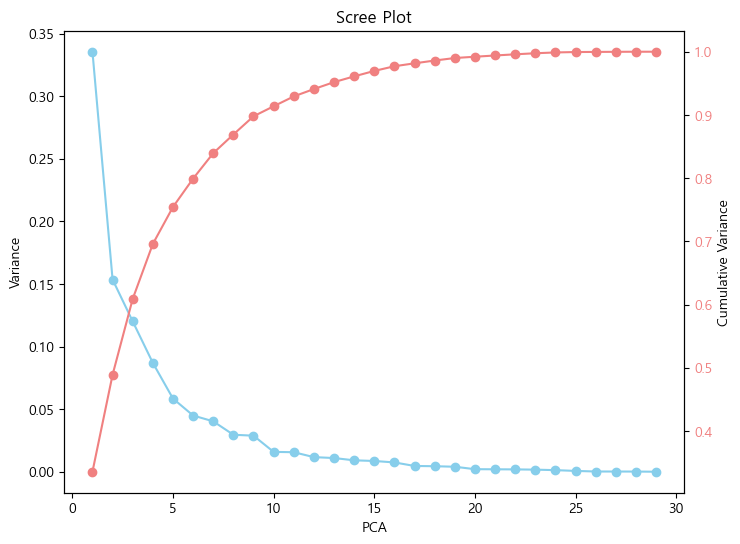

In [69]:
n_feature = len(data_br_scaled.columns)
pca_scree = PCA(n_components=n_feature)
pca_scree.fit(data_br_scaled)
pc_arr = np.arange(pca_scree.n_components_)+1
vals = pca_scree.explained_variance_ratio_
cumvals = np.cumsum(vals)

fig, ax1 = plt.subplots(figsize=(8,6))

# 분산그래프
# 각 주성분이 데이터 분산을 얼마나 설명하는지 보여줌
# y축 : 주성분의 설명된 분산 비율 / x축 : 주성분 순서
# 높은 분산 비율을 가진 주성분일수록 원본 데이터 잘 설명
ax1.plot(pc_arr, vals, color='skyblue', marker='o')  # 선 색상과 점을 추가
ax1.set_xlabel("PCA")
ax1.set_ylabel("Variance") 
ax1.tick_params(axis='y')  

ax1.set_title("Scree Plot")
# 누적 분산 그래프
# 주성분이 추가되면서 누적되는 분산의 비율
# 누적 분사이 80-90% 도달 지점을 기준으로 적절한 주성분 수 결정
ax2 = ax1.twinx()
ax2.plot(pc_arr, cumvals, color='lightcoral', marker='o')
ax2.set_ylabel("Cumulative Variance")
ax2.tick_params(axis='y', labelcolor='lightcoral')

plt.show()

In [70]:
# 라벨 미리 설정
label_br = total['Store']

In [7]:
# PCA 호출
# n_components : 축소할 차원의 수, 기존 칼럼의 갯수만큼 넣어도 되지만, 최상위 차원 2개만 사용
pca = PCA(n_components=2)

# 데이터에 PCA 적용
# scaled_data는 MinMaxScaler를 통해 스케일링된 DF
# PCA 결과를 DataFrame으로 변환
# pca.fit_transform :스케일러된 결과를 바로 출력
pca_data2 = pd.DataFrame(data=pca.fit_transform(scaled_data), columns=['pca1', 'pca2'])

# 분산 비율
# 기존 분산 보존율
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

pca_data2['label'] = label_br
print(pca_data2[1111:1122])

Explained variance ratio: [0.34781062 0.14249058]
          pca1      pca2 label
1111 -0.116536  0.041301    뀌숑
1112 -0.105617  0.046324    뀌숑
1113 -0.086790 -0.188082    뀌숑
1114 -0.123804  0.040654    뀌숑
1115 -0.115818 -0.214933    뀌숑
1116  0.775940  0.413576    뀌숑
1117 -0.037465 -0.220933    뀌숑
1118 -0.276500  0.269173    뀌숑
1119  0.025613 -0.170964    뀌숑
1120  0.908810  0.187838    뀌숑
1121 -0.105617  0.046324    뀌숑


In [8]:
# pca와 기존 변수 간 선형 관계 정도
compo_2 = pca.components_
compo_2
# 안쪽의 대괄호는 하나의 pca를 뜻함
# 그 안의 값들 중 절대값 큰 것이 해당 pca에 영향을 크게 끼친것

array([[-9.27709296e-02,  3.65497971e-04, -5.14146895e-03,
        -3.79420913e-01, -1.06816088e-01, -9.96017787e-04,
        -3.00212509e-04,  4.49152577e-04, -9.60200602e-04,
        -8.56013300e-04, -8.26543211e-03, -5.80559881e-02,
        -1.52056923e-01, -5.35944099e-02, -1.37409352e-02,
        -6.87007805e-03, -2.23013877e-02, -1.24510299e-02,
        -1.33299008e-02, -2.24433178e-03, -4.20333434e-03,
        -2.58416686e-03, -3.25945037e-03, -1.40051879e-03,
        -1.68979628e-02, -7.27481900e-02, -2.00041858e-02,
        -6.67896995e-03, -8.94109051e-01],
       [ 1.99889986e-03,  2.26185760e-03,  5.19588449e-02,
         9.14510360e-01, -1.54516707e-01,  8.38692553e-04,
        -2.87050340e-04, -2.30956299e-04,  6.43665449e-04,
         1.06462186e-03, -3.52043139e-02, -5.37027193e-02,
        -1.15564310e-02,  1.16441196e-02,  1.17123245e-03,
        -3.67683225e-03, -8.57829847e-03, -2.87373074e-03,
        -1.07825969e-02,  1.74043671e-03, -2.57872909e-03,
        -4.46

### 시각화

In [10]:
# matplotlib의 폰트 관련 설정
plt.rc('font', family='Malgun Gothic') # Windows용 한글 폰트 설정
plt.rc('axes', unicode_minus=False) # 마이너스 기호 오류 방지

In [ ]:
#PCA 시각화 with Seaborn
g = sns.FacetGrid(pca_data2, hue="label", height = 5, margin_titles = True,
                  palette = sns.color_palette("pastel",  n_colors=len(pca_data2['label'].unique())))
g.map_dataframe(plt.scatter, "pc1", "pc2")
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("pca - bread")
g.set_xlabels("pca1")
g.set_ylabels("pca2")

In [ ]:
# Pairplot 생성
sns.pairplot(pca_data2, hue="label", vars=['pca1', 'pca2'],
             palette=sns.color_palette("pastel", n_colors=len(pca_data2['label'].unique())))

 # 제목 설정, y=1.02로 조정하여 제목이 그래프와 겹치지 않도록 함
plt.suptitle("PCA Components Pairplot", y=1.02) 
plt.show()

In [14]:
# 성분 로딩을 DataFrame으로 변환하여 보기 쉽게 만들기
# 기존의 차원이 새로운 차원에 얼마만큼 기여하는지 보여주는 DF
compo_2df = pd.DataFrame(compo_2, columns=scaled_data.columns, index=[f'pca{idx+1}' for idx in range(compo_2.shape[0])])
compo_2df

Review_score  Review_counts     slope     bread  beverage     vegan  \
pca1     -0.092771       0.000365 -0.005141 -0.379421 -0.106816 -0.000996   
pca2      0.001999       0.002262  0.051959  0.914510 -0.154517  0.000839   

      no_senior   no_kids       pet  whole_wheat  ...  special_menu     photo  \
pca1  -0.000300  0.000449 -0.000960    -0.000856  ...     -0.002244 -0.004203   
pca2  -0.000287 -0.000231  0.000644     0.001065  ...      0.001740 -0.002579   

      good_music  reservation_possible  unique_concept  beautiful_interior  \
pca1   -0.002584             -0.003259       -0.001401           -0.016898   
pca2   -0.004469              0.001245       -0.005871           -0.026413   

         price      wait    health  sentiment  
pca1 -0.072748 -0.020004 -0.006679  -0.894109  
pca2 -0.022680 -0.002688  0.001555  -0.362203  

[2 rows x 29 columns]

In [137]:
# PCA 객체 생성
# n_components : 축소할 차원의 수, 기존 칼럼의 갯수만큼 넣어도 되지만, 최상위 차원 n개만 사용
pca = PCA(n_components=9)

# 데이터에 PCA 적용
# scaled_data는 MinMaxScaler를 통해 스케일링된 DF
# PCA 결과를 DataFrame으로 변환
# pca.fit_transform :스케일러된 결과를 바로 출력
pca_data6 = pd.DataFrame(data=pca.fit_transform(data_br_scaled), columns=['pca1', 'pca2','pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9'])

# 분산 비율
# 기존 분산 보존율 
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

pca_data6['label'] = label_br
pca_data6.info()

Explained variance ratio: [0.33532437 0.15343583 0.11998672 0.08688572 0.05841043 0.04488164
 0.04022714 0.02952198 0.028789  ]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15227 entries, 0 to 15226
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pca1    15227 non-null  float64
 1   pca2    15227 non-null  float64
 2   pca3    15227 non-null  float64
 3   pca4    15227 non-null  float64
 4   pca5    15227 non-null  float64
 5   pca6    15227 non-null  float64
 6   pca7    15227 non-null  float64
 7   pca8    15227 non-null  float64
 8   pca9    15227 non-null  float64
 9   label   15227 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.2+ MB


In [83]:
# pca와 기존 변수 간 선형 관계 정도
compo_6 = pca.components_
compo_6
# 안쪽의 대괄호는 하나의 pca를 뜻함
# 그 안의 값들 중 절대값 큰 것이 해당 pca에 영향을 크게 끼친것

array([[-3.31565510e-03,  4.08494374e-05, -7.15745349e-04,
        -9.84274000e-01, -2.25083803e-02, -1.31093798e-03,
        -9.97049911e-06,  7.59857503e-04, -1.28193745e-03,
        -9.83083945e-04,  1.54926925e-02, -3.35853937e-02,
        -1.48204444e-01, -6.21898321e-02, -1.49854688e-02,
        -2.77416897e-03, -1.74903803e-02, -1.14432703e-02,
        -5.35304191e-03, -1.89086050e-03, -3.11636782e-03,
         3.84716352e-04, -3.70715972e-03,  1.11436718e-03,
        -3.29871007e-03, -4.97810136e-02, -1.48099828e-02,
        -6.47411846e-03, -2.24516203e-03],
       [-4.22055861e-03,  1.53889922e-03,  1.12273455e-03,
         1.00657596e-01, -8.18358802e-01,  9.10031777e-04,
         1.41546153e-05,  2.86542567e-03, -2.16314687e-03,
         2.10158405e-03, -6.96815251e-02, -3.74039637e-01,
        -3.65365000e-01, -1.28353612e-01, -3.87717198e-02,
        -5.84627537e-03, -6.77356514e-02, -4.37055077e-02,
        -3.76396290e-02, -3.66512006e-03, -2.15507323e-02,
        -1.43

In [84]:
# 성분 로딩을 DataFrame으로 변환하여 보기 쉽게 만들기
# 기존의 차원이 새로운 차원에 얼마만큼 기여하는지 보여주는 DF
# 절대값이 클수록 pca에 많이 관여
# 양수 : 비례 / 음수 : 반비례
compo_6df = pd.DataFrame(compo_6, columns=data_br_scaled.columns, index=[f'pca{idx+1}' for idx in range(compo_6.shape[0])])
compo_6df
# pca1이 큰 군집은 가지마세요<< idea!!!

Review_score  Review_counts     slope     bread  beverage     vegan  \
pca1     -0.003316       0.000041 -0.000716 -0.984274 -0.022508 -0.001311   
pca2     -0.004221       0.001539  0.001123  0.100658 -0.818359  0.000910   
pca3      0.002549      -0.000735  0.000609 -0.125138 -0.523430 -0.000641   
pca4     -0.002094       0.000777  0.000299  0.042841 -0.218459  0.000179   
pca5     -0.002002       0.001483  0.001412  0.038019  0.076805 -0.000100   
pca6     -0.000119       0.002312 -0.003826 -0.023469 -0.036466  0.001886   
pca7      0.001327       0.001236  0.000282  0.000621 -0.016375 -0.001156   
pca8     -0.001856      -0.000208  0.000741  0.037418  0.010230 -0.000408   
pca9      0.000974      -0.000721  0.003893  0.007328 -0.013910 -0.000211   

      no_senior   no_kids       pet  whole_wheat  ...  special_menu     photo  \
pca1  -0.000010  0.000760 -0.001282    -0.000983  ...     -0.001891 -0.003116   
pca2   0.000014  0.002865 -0.002163     0.002102  ...     -0.003665 -0.021551   
pca3  -0.000012 -0.000453  0.001190    -0.000129  ...      0.004094  0.011637   
pca4  -0.000221  0.000308 -0.002411    -0.000445  ...      0.004329  0.031810   
pca5  -0.000978 -0.002693  0.000968    -0.000302  ...     -0.000168  0.000855   
pca6   0.000591 -0.001911 -0.000119     0.000265  ...      0.004480  0.016406   
pca7  -0.002925  0.004432 -0.001380    -0.000784  ...      0.009921  0.040005   
pca8  -0.000024 -0.003911  0.004928    -0.003151  ...     -0.010215  0.014339   
pca9  -0.000058  0.001794  0.003630     0.000273  ...      0.004752  0.009851   

      good_music  reservation_possible  unique_concept  beautiful_interior  \
pca1    0.000385             -0.003707        0.001114           -0.003299   
pca2   -0.014355             -0.001629       -0.005707           -0.093233   
pca3    0.006227              0.008167        0.002127            0.036570   
pca4    0.020904             -0.009072        0.007967            0.179146   
pca5    0.000057             -0.000254        0.000272            0.013116   
pca6    0.003631              0.001775        0.007815            0.168620   
pca7   -0.004061              0.000562        0.017664            0.946319   
pca8    0.011111              0.004450       -0.004931            0.168982   
pca9    0.009701             -0.001477        0.005375           -0.042840   

         price      wait    health  sentiment  
pca1 -0.049781 -0.014810 -0.006474  -0.002245  
pca2 -0.079023 -0.016380  0.002432  -0.002672  
pca3  0.016634  0.008802  0.012392   0.001048  
pca4 -0.079061 -0.000012 -0.003356  -0.000835  
pca5 -0.989821 -0.033364 -0.009213  -0.002314  
pca6 -0.024955  0.008485  0.013719   0.000654  
pca7  0.016701 -0.009935  0.004754  -0.000078  
pca8  0.036793 -0.033762 -0.057978  -0.000141  
pca9 -0.037978  0.010828  0.008609   0.000860  

[9 rows x 29 columns]

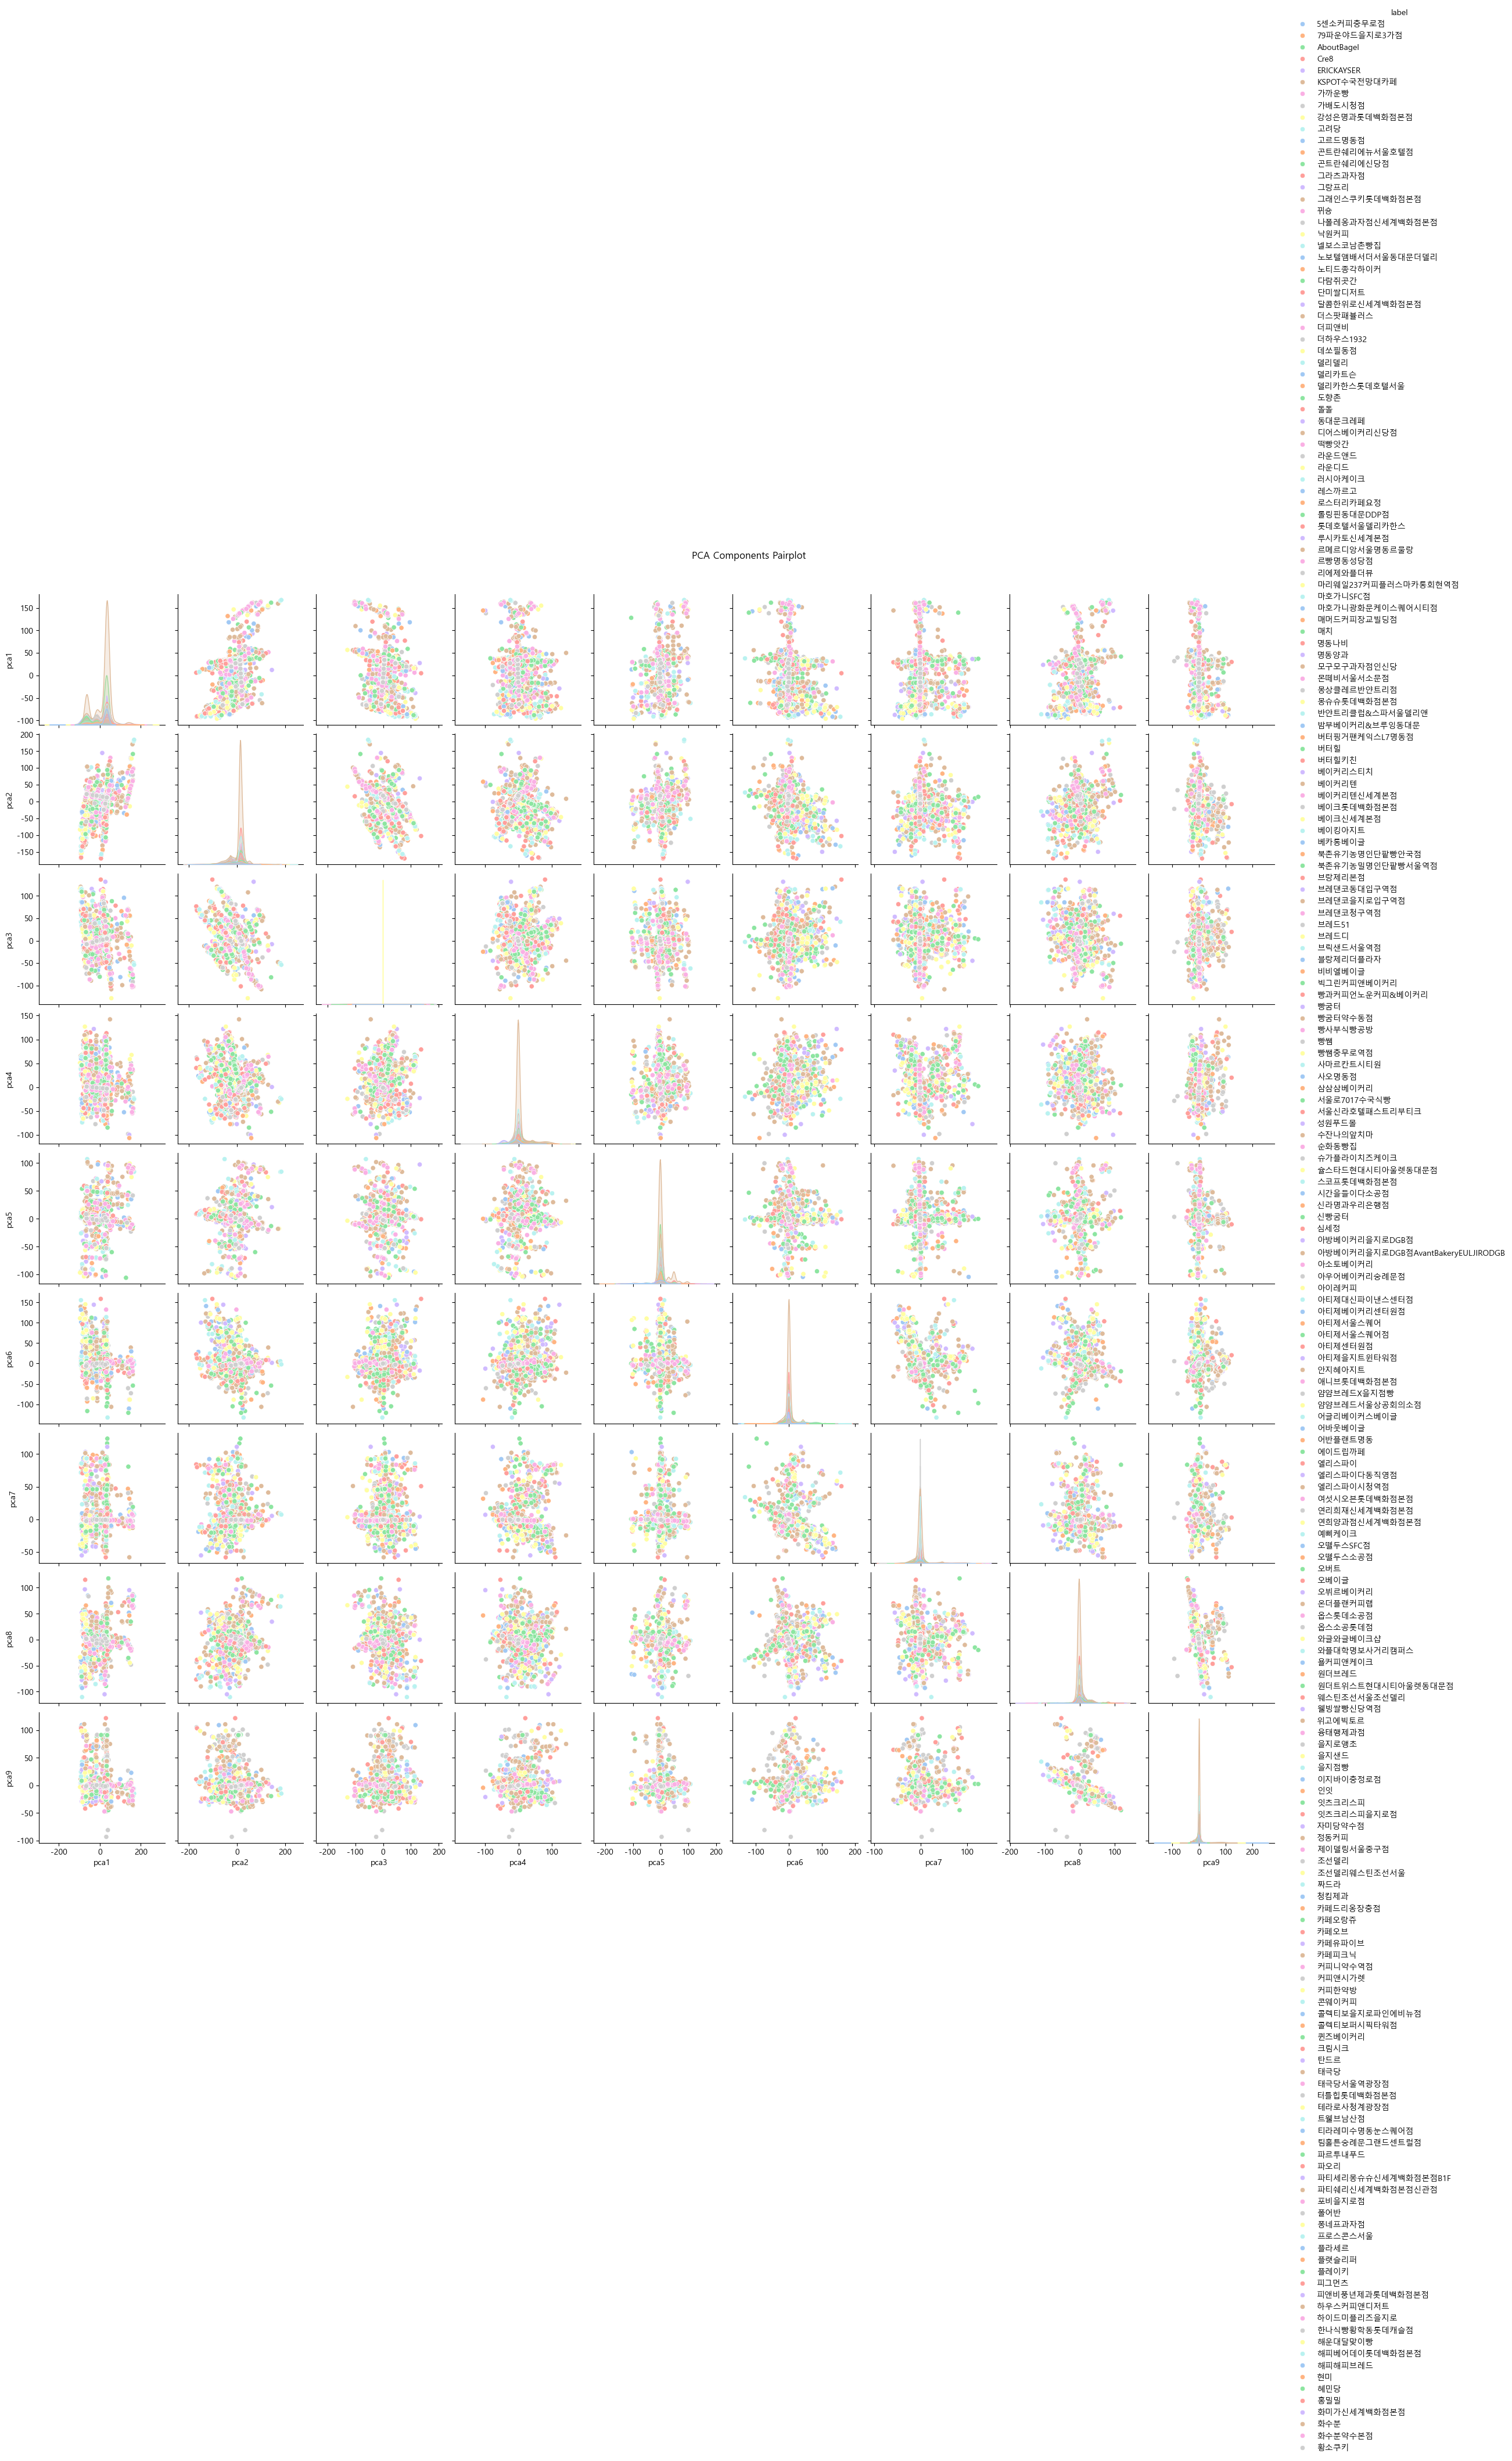

In [85]:
# Pairplot 생성
# pca 다차원 데이터의 변동성이 가장 큰 방향으로 데이터를 투영하면서 차원을 축소하는 방법
sns.pairplot(pca_data6, hue="label", vars=['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9'],
             palette=sns.color_palette("pastel", n_colors=len(pca_data6['label'].unique())))

# 제목 설정, y=1.02로 조정하여 제목이 그래프와 겹치지 않도록 함
plt.suptitle("PCA Components Pairplot", y=1.02) 
plt.show()

# 각 pairplot 간의 관련이 없다면 고르게 분포
# 데이터가 특정 영역 몰려있는 경우, 해당 주성분들이 데이터를 구분하는데 중요한 역할 - 비슷한 특성을 가진 데이터일 수 있음 

## t-SNE

- 클러스터링 결과를 시각화할 때 주로 사용
- 고차원의 데이터를 차원 축소를 통한 시각화에 특화됨
    - 가까이 있는 데이터와의 거리 뿐만 아니라 멀리 있는 데이터와의 거리도 같이 신경씀


In [26]:
tsne = TSNE(n_components=3)
br_tsne = pd.DataFrame(data = tsne.fit_transform(scaled_data), columns = ['cl1', 'cl2', 'cl3'])
br_tsne["label"] = label_br
br_tsne

cl1        cl2        cl3      label
0      20.538914 -20.173452  -4.268682  5센소커피충무로점
1      -3.782538  -7.905693 -32.854473  5센소커피충무로점
2      22.146921  10.620656   8.380805  5센소커피충무로점
3      20.538914 -20.173452  -4.268682  5센소커피충무로점
4       9.531466   0.671188 -11.290980  5센소커피충무로점
...          ...        ...        ...        ...
15222  -2.699822   7.431843  27.053133       황소쿠키
15223 -18.995314   3.362061 -20.864168       황소쿠키
15224 -17.425743   5.117404   3.734846       황소쿠키
15225 -14.860141  12.662874  -4.316275       황소쿠키
15226 -14.586553  -7.529560   6.970886       황소쿠키

[15227 rows x 4 columns]

In [ ]:
#t-sne 시각화
g = sns.FacetGrid(br_tsne, hue="label", height = 8, margin_titles = True,
                  palette = sns.color_palette("pastel", n_colors=len(br_tsne['label'].unique())))
g.map_dataframe(plt.scatter, "cl1", "cl2")
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("t-sne - bread")
g.set_xlabels("X")
g.set_ylabels("Y")


In [29]:
# 3d plotting
tsne = TSNE(n_components=3, n_iter=500)
br_tsne_3d = pd.DataFrame(data = tsne.fit_transform(scaled_data), columns = ['col1', 'col2', 'col3'])
br_tsne_3d["label"] = label_br

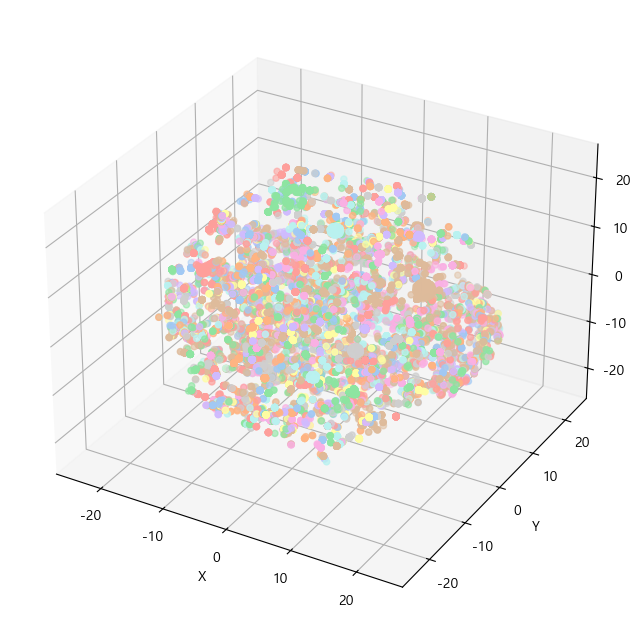

In [116]:
#t-sne 시각화
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# fig = plt.figure(figsize = (8,8))
# ax = Axes3D(fig)
# fig.add_axes(ax)

# sc= ax.scatter("col1", "col2", "col3",\
#                data = br_tsne_3d,\
#                c = br_tsne_3d["label"],\
#                cmap = ListedColormap(sns.color_palette("pastel", n_colors=len(br_tsne_3d['label'].unique()))))

# plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# 라벨을 숫자로 변환
labels, unique = pd.factorize(br_tsne_3d['label'])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# 숫자로 매핑된 라벨을 사용하여 색상을 지정
sc = ax.scatter(br_tsne_3d['col1'], br_tsne_3d['col2'], br_tsne_3d['col3'],
                # 변환된 라벨 사용
                c=labels,  
                # 고유 라벨의 수에 기반한 컬러 팔레트
                cmap=ListedColormap(sns.color_palette("pastel", n_colors=len(unique))))  

# 레전드 추가 (각 고유 라벨에 대한 설명)
legend1 = ax.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
ax.add_artist(legend1)

# 축 라벨 설정
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.show()

In [ ]:
# legned 불러오기
sc.legend_elements()

# 클러스터링

## 계층적 군집화

In [138]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [140]:
pca_data6 = pca_data6.drop(['label'], axis = 1)
pca_data6.info()

MemoryError: unable to allocate array data.

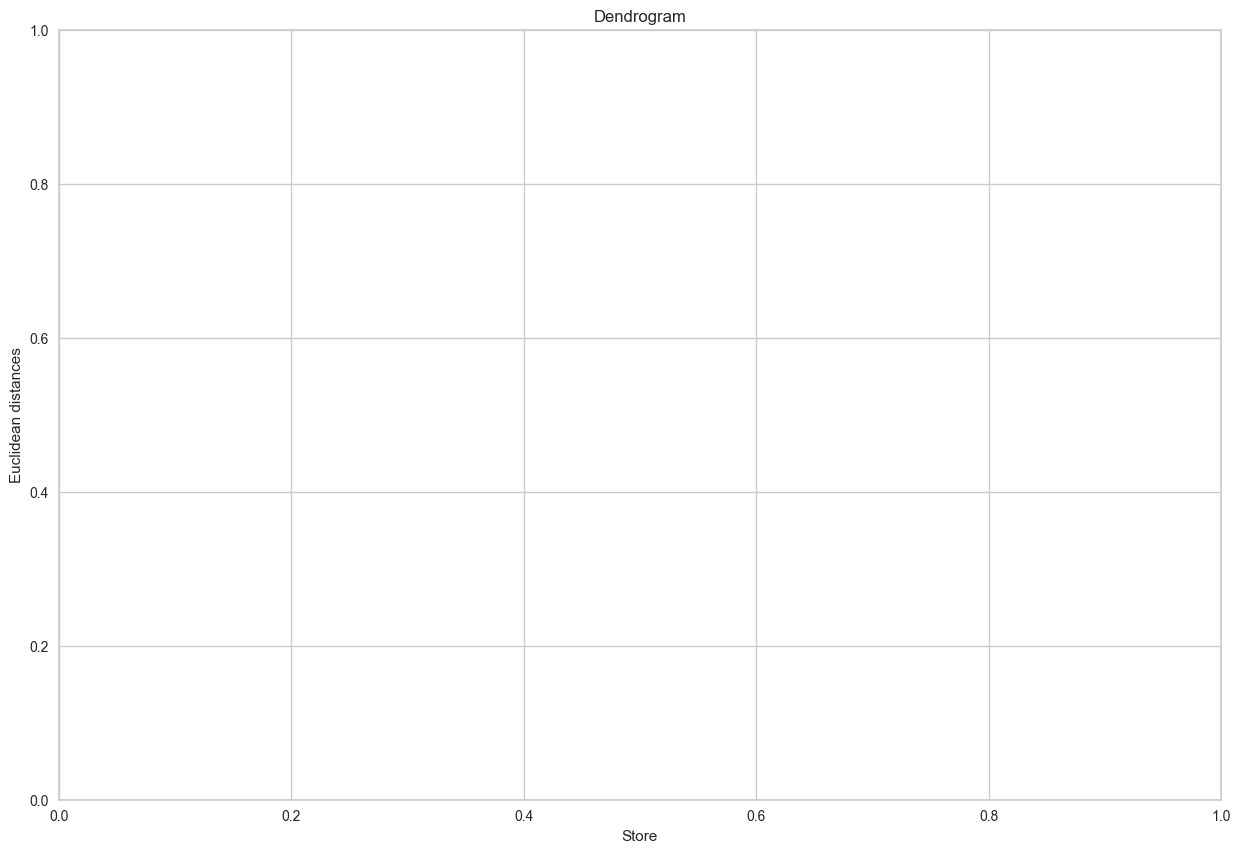

In [141]:
plt.figure(figsize=(15,10))
plt.title('Dendrogram')
plt.xlabel('Store')
plt.ylabel('Euclidean distances')
dgram = dendrogram(linkage(pca_data6, method = 'ward'))
plt.show()

In [ ]:
# 코사인 유사도 계산
cosine_sim = cosine_similarity(scaled_data)

# 코사인 거리로 변환
cosine_dist = 1 - cosine_sim

# AgglomerativeClustering을 사용하여 사전 계산된 거리 행렬로 계층적 군집화 수행
clustering = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='complete')
clustering.fit(cosine_dist)

# 군집화 결과 출력
print("Cluster labels:", clustering.labels_)

In [ ]:
# 코사인 거리이용한 계층적 군집화
cosine_sim = cosine_similarity(scaled_data)

# 코사인 거리 계산 (코사인 거리 = 1 - 코사인 유사도)
cosine_dist = 1 - cosine_sim

# 'precomputed' 옵션을 사용하여 이미 계산된 거리 행렬을 linkage 함수에 전달
# 'single' 연결 방식을 사용합니다. 다른 연결 방식('complete', 'average', 'ward')도 시도해볼 수 있습니다.
Z = linkage(cosine_dist, method='single', metric='precomputed')

# 덴드로그램 그리기
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=np.arange(scaled_data.shape[0]))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Cosine distance")
plt.show()

## K-means

In [135]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from sklearn.metrics import silhouette_score, silhouette_samples
import plotly.graph_objects as go

In [136]:
# pca_data는 PCA를 통해 차원이 축소된 데이터 프레임입니다.
# 'label' 열을 제외하고 클러스터링을 수행합니다.
pca_data6 = pca_data6.drop('label', axis=1)
pca_data6.info()

KeyError: "['label'] not found in axis"

In [134]:
# K값에 따른 Silhouette 계수 비교
# 군집 분석의 성능을 평가하는 지표
for k in range(2,30):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(pca_data6)
    silhouette_avg = silhouette_score(pca_data6, kmeans.labels_)
    print("k = {} -> silhouette index {}".format(k, silhouette_avg))

MemoryError: Unable to allocate 1.00 GiB for an array with shape (8814, 15227) and data type float64

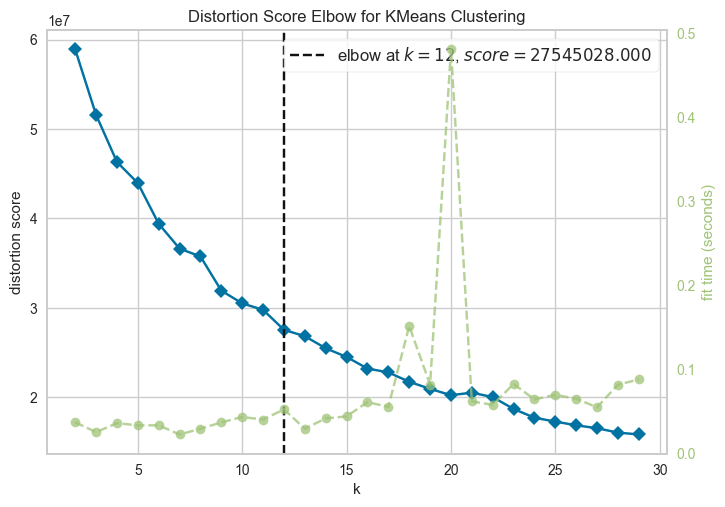

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=29, random_state=9), k=(2, 30))

In [109]:
# 엘보포인트 그려주는 패키지
from yellowbrick.cluster.elbow import kelbow_visualizer

kelbow_visualizer(KMeans(random_state=9), pca_data6, k=(2,30))
# 훨씬 중요

In [114]:
# k-menas 실행
# n_clusters : 클러스터 수 지정
kmeans = KMeans(n_clusters=12, random_state=0, init="random").fit(pca_data6)
br_centroids = pd.DataFrame(kmeans.cluster_centers_, columns = pca_data6.columns)
br_centroids

pca1       pca2       pca3       pca4       pca5       pca6  \
0   -77.760430 -33.483988  67.788410 -30.129997   5.592320  -0.458977   
1   -63.345137  22.112787  -7.491709   1.853018   1.789179  -0.680596   
2     9.828255 -16.003329  58.360399 -31.534860   2.668948  -2.007678   
3    35.119788  12.704195   5.798574  -0.990326   1.017728   1.759913   
4   -14.892897  17.278535  -1.387340   0.789382   2.567287   0.010861   
5    31.903020 -40.519026 -22.027330 -12.549142   0.932257  -1.135485   
6    -2.052093   5.601683   2.099695  -8.315231 -72.977019  -1.476805   
7   138.497746  37.959674 -14.395080  -2.191867  20.025912  -5.574655   
8    44.431870  43.072103 -55.856475  32.788748  -5.734752   2.399418   
9   -40.596637 -42.299978 -34.458684  -7.488635   4.804689   0.709999   
10   -5.394600 -32.363617  15.232237  41.159341   1.598557  12.849761   
11    6.049062 -40.308663  29.732458  68.830691  -2.067660 -14.892372   

         pca7       pca8      pca9  
0   -2.200006   0.918952 -0.441032  
1   -1.326770   0.612978  0.362839  
2   -0.521574   2.359582 -0.877487  
3   -0.875960  -1.679409  0.650973  
4   -1.085324  -1.378314  0.191784  
5   -1.037019  -0.954518  0.345712  
6    0.303543   0.914922 -2.966774  
7   -0.560717  18.213013 -7.521969  
8   -1.262206  -7.824784  0.680190  
9   -2.297477   0.530464 -1.219964  
10  69.221892   8.279613 -1.182696  
11 -20.280485   7.540125 -1.175612

In [115]:
# Counter : 해시 가능한 객체를 카운트, 딕셔너리로 저장
c = Counter()
# 각 클러스터에 속한 데이터 수 카운트
c.update(kmeans.labels_)
c

Counter({3: 4964,
         1: 2698,
         4: 1958,
         5: 1826,
         9: 1021,
         2: 604,
         11: 565,
         0: 408,
         10: 394,
         6: 365,
         8: 261,
         7: 163})

In [116]:
# 센트로이드와 각 군집에 속하는 데이터 포인트 수 결함
label_counts = [c[x] for x in br_centroids.index]
# br_centroids : 클러스터링 결과 군집의 중심점을 저장하는 DF
br_centroids['size'] = label_counts
br_centroids

pca1       pca2       pca3       pca4       pca5       pca6  \
0   -77.760430 -33.483988  67.788410 -30.129997   5.592320  -0.458977   
1   -63.345137  22.112787  -7.491709   1.853018   1.789179  -0.680596   
2     9.828255 -16.003329  58.360399 -31.534860   2.668948  -2.007678   
3    35.119788  12.704195   5.798574  -0.990326   1.017728   1.759913   
4   -14.892897  17.278535  -1.387340   0.789382   2.567287   0.010861   
5    31.903020 -40.519026 -22.027330 -12.549142   0.932257  -1.135485   
6    -2.052093   5.601683   2.099695  -8.315231 -72.977019  -1.476805   
7   138.497746  37.959674 -14.395080  -2.191867  20.025912  -5.574655   
8    44.431870  43.072103 -55.856475  32.788748  -5.734752   2.399418   
9   -40.596637 -42.299978 -34.458684  -7.488635   4.804689   0.709999   
10   -5.394600 -32.363617  15.232237  41.159341   1.598557  12.849761   
11    6.049062 -40.308663  29.732458  68.830691  -2.067660 -14.892372   

         pca7       pca8      pca9  size  
0   -2.200006   0.918952 -0.441032   408  
1   -1.326770   0.612978  0.362839  2698  
2   -0.521574   2.359582 -0.877487   604  
3   -0.875960  -1.679409  0.650973  4964  
4   -1.085324  -1.378314  0.191784  1958  
5   -1.037019  -0.954518  0.345712  1826  
6    0.303543   0.914922 -2.966774   365  
7   -0.560717  18.213013 -7.521969   163  
8   -1.262206  -7.824784  0.680190   261  
9   -2.297477   0.530464 -1.219964  1021  
10  69.221892   8.279613 -1.182696   394  
11 -20.280485   7.540125 -1.175612   565

In [117]:
#Centroid 시각화를 통해 각 군집의 특성 파악
def plot_radar_from_centroid(df_centroids):
  df_centroids = df_centroids.drop(['size'], axis = 1)
  fig = go.Figure()
  categories = df_centroids.columns
  for row in df_centroids.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=row[1].tolist(),
        theta=categories,
        fill='toself',
        name='cluster {}'.format(row[0])
    ))

  fig.update_layout(
      autosize=False,
      width=800,
      height=550,
  )
  fig.show()
  
plot_radar_from_centroid(br_centroids)

In [119]:
compl_cluster = pca_data6
compl_cluster['cluster'] = kmeans.labels_
compl_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15227 entries, 0 to 15226
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   pca1     15227 non-null  float64
 1   pca2     15227 non-null  float64
 2   pca3     15227 non-null  float64
 3   pca4     15227 non-null  float64
 4   pca5     15227 non-null  float64
 5   pca6     15227 non-null  float64
 6   pca7     15227 non-null  float64
 7   pca8     15227 non-null  float64
 8   pca9     15227 non-null  float64
 9   cluster  15227 non-null  int32  
dtypes: float64(9), int32(1)
memory usage: 1.1 MB


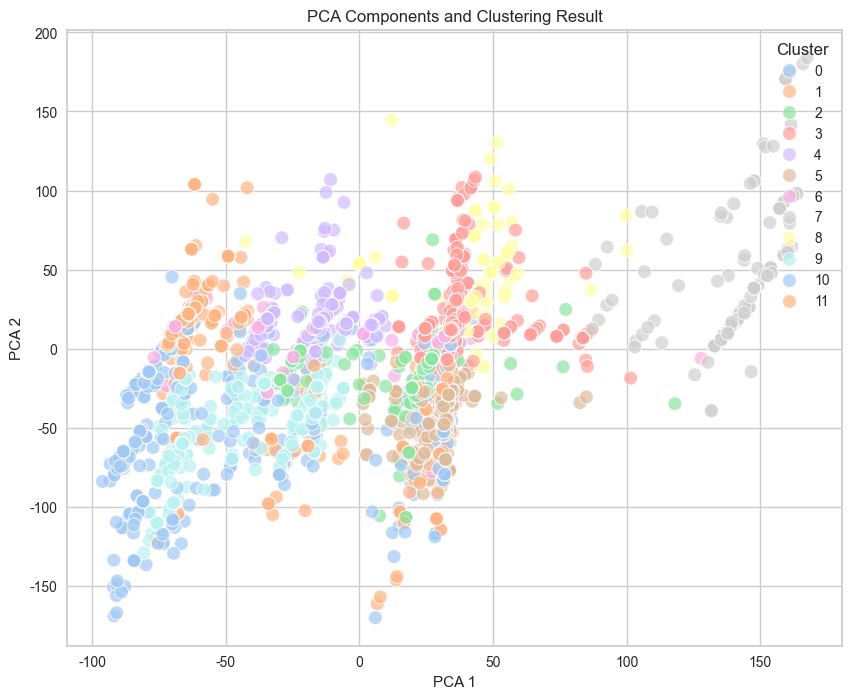

In [122]:
# compl_cluster 데이터프레임에서 'pca1', 'pca2' 컬럼을 사용하여 산점도를 그리고,
# 'label' 컬럼의 값에 따라 다른 색상으로 점을 표시합니다.
plt.figure(figsize=(10, 8))
sns.scatterplot(data = compl_cluster, x='pca1', y='pca2', hue='cluster', palette='pastel', s=100, alpha=0.7)

# 그래프의 제목과 축 라벨 설정
plt.title('PCA Components and Clustering Result')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# 범례 표시
plt.legend(title='Cluster', loc='upper right')

plt.show()

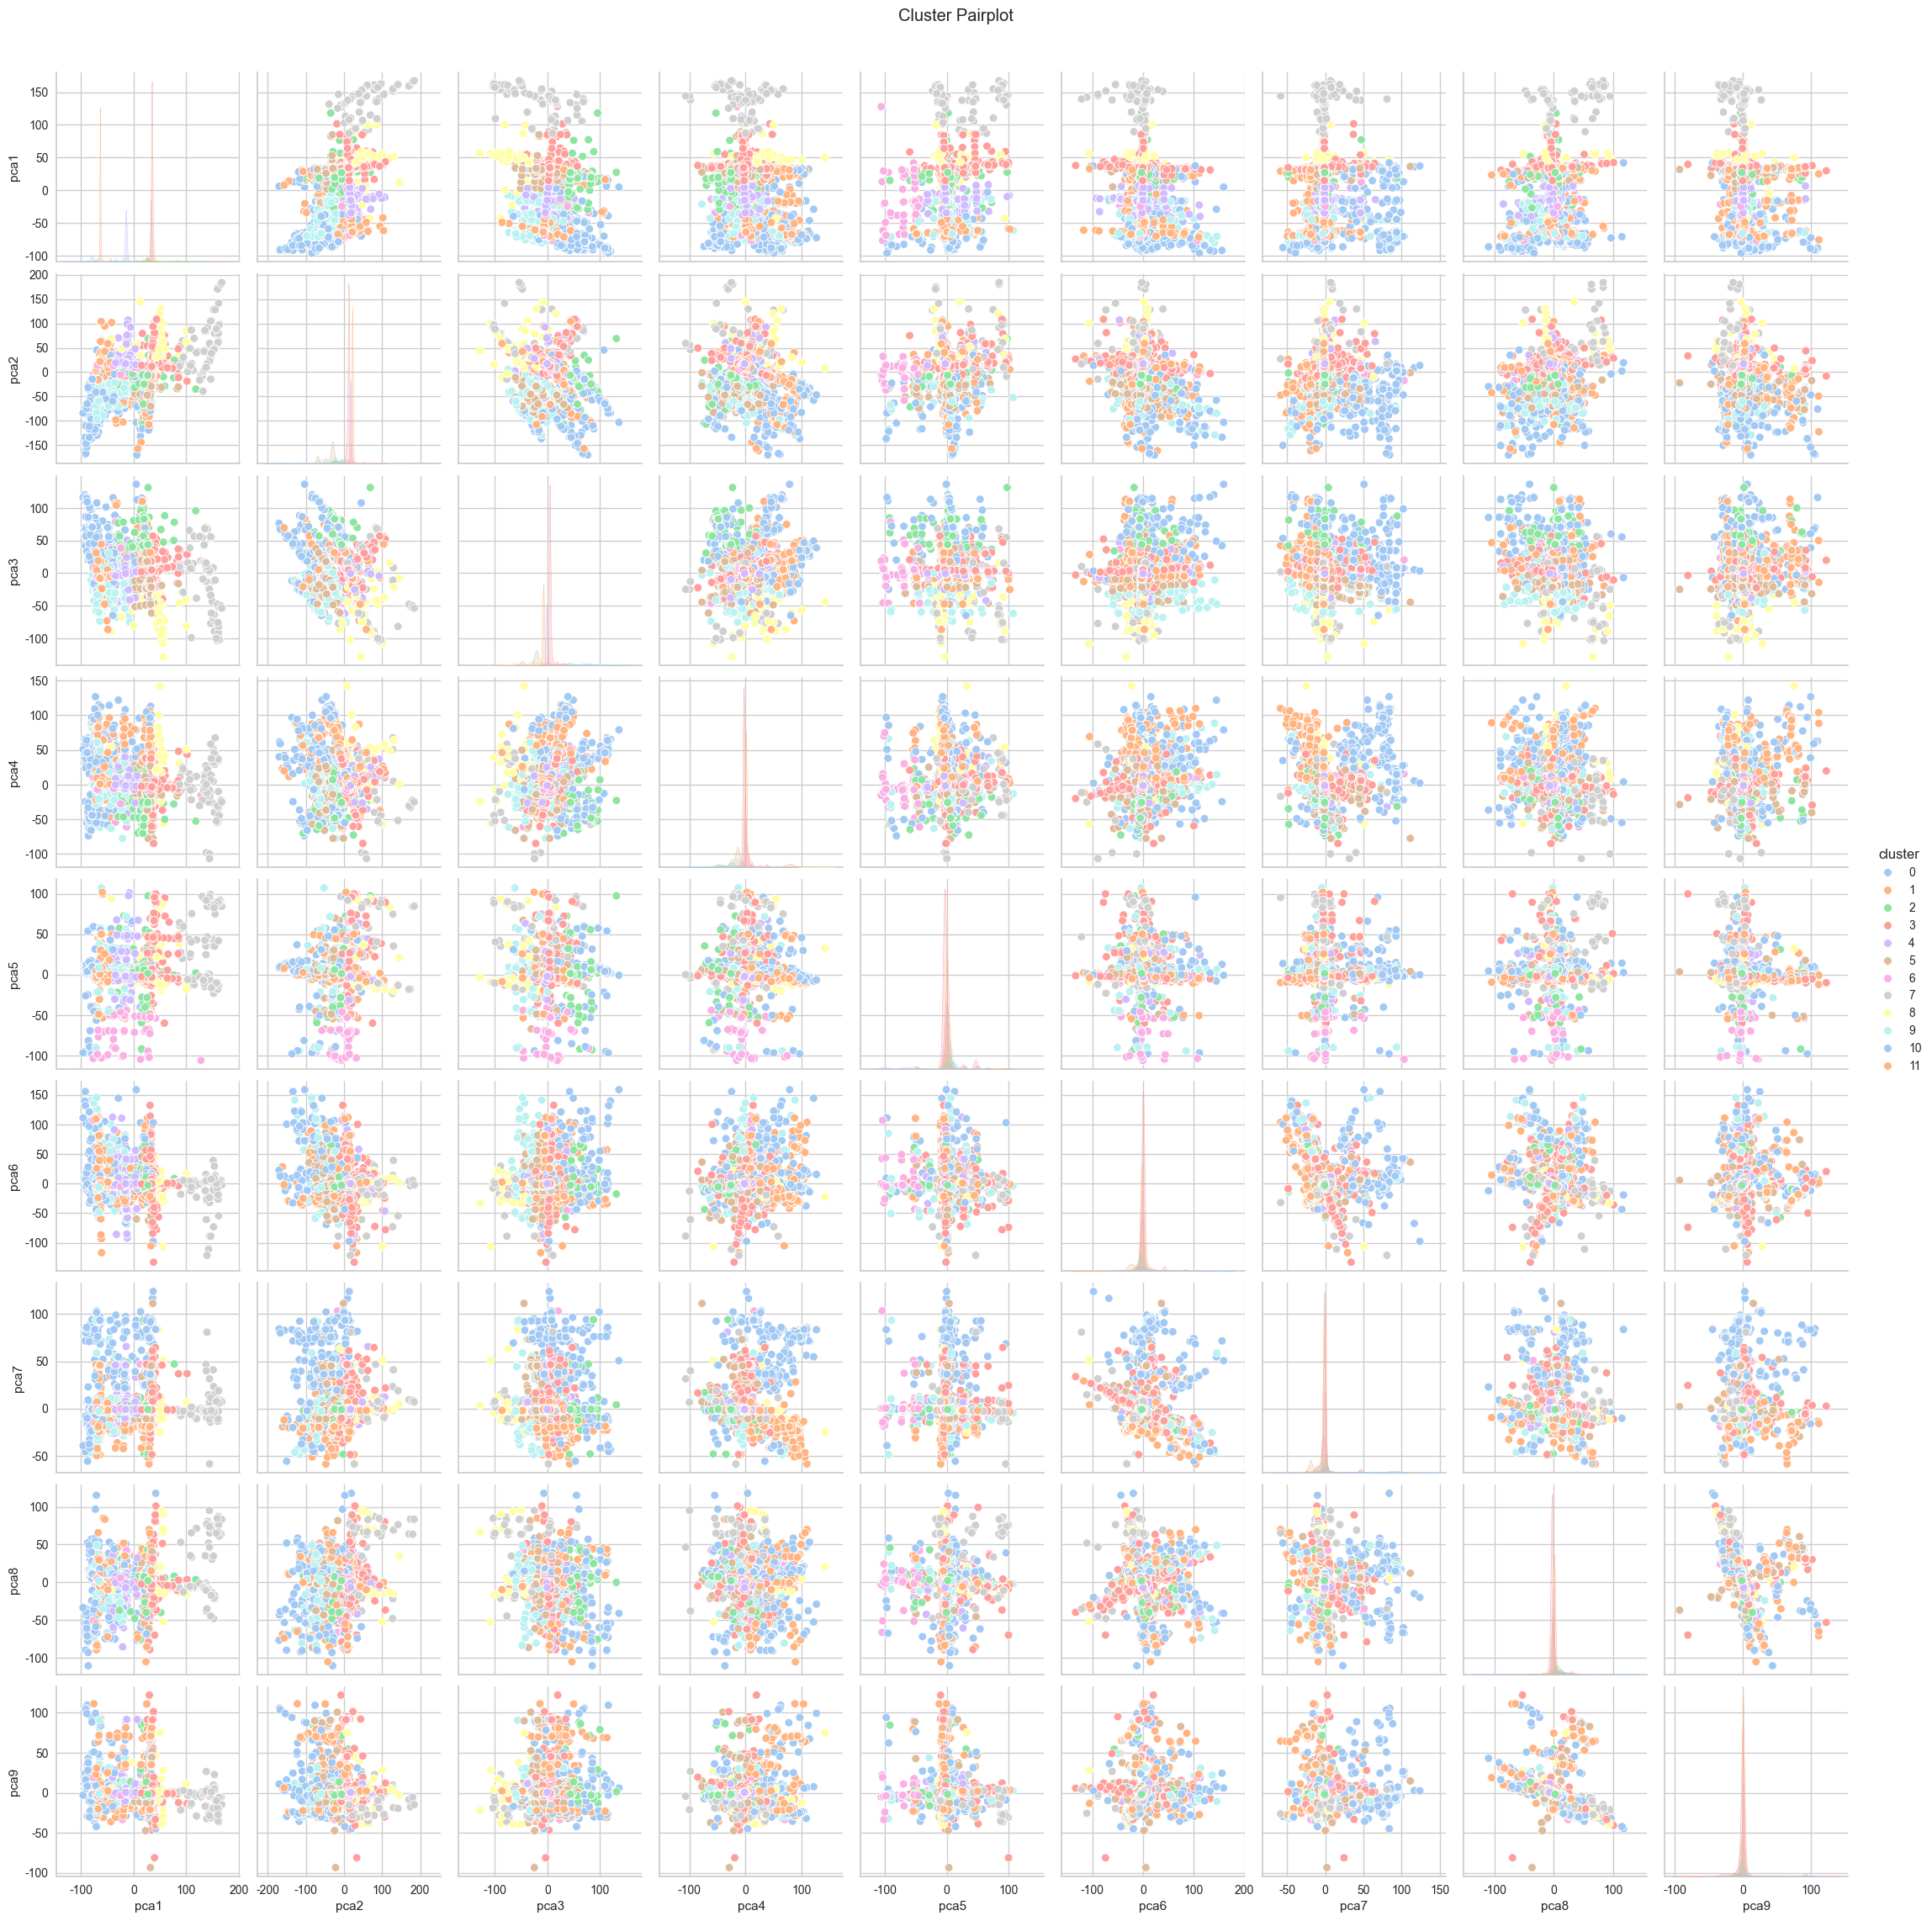

In [133]:
# Pairplot 생성
# pca 다차원 데이터의 변동성이 가장 큰 방향으로 데이터를 투영하면서 차원을 축소하는 방법
sns.pairplot(compl_cluster, hue="cluster", vars=['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9'],
             palette=sns.color_palette("pastel", n_colors=len(compl_cluster['cluster'].unique())))

# 제목 설정, y=1.02로 조정하여 제목이 그래프와 겹치지 않도록 함
plt.suptitle("Cluster Pairplot", y=1.02) 
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


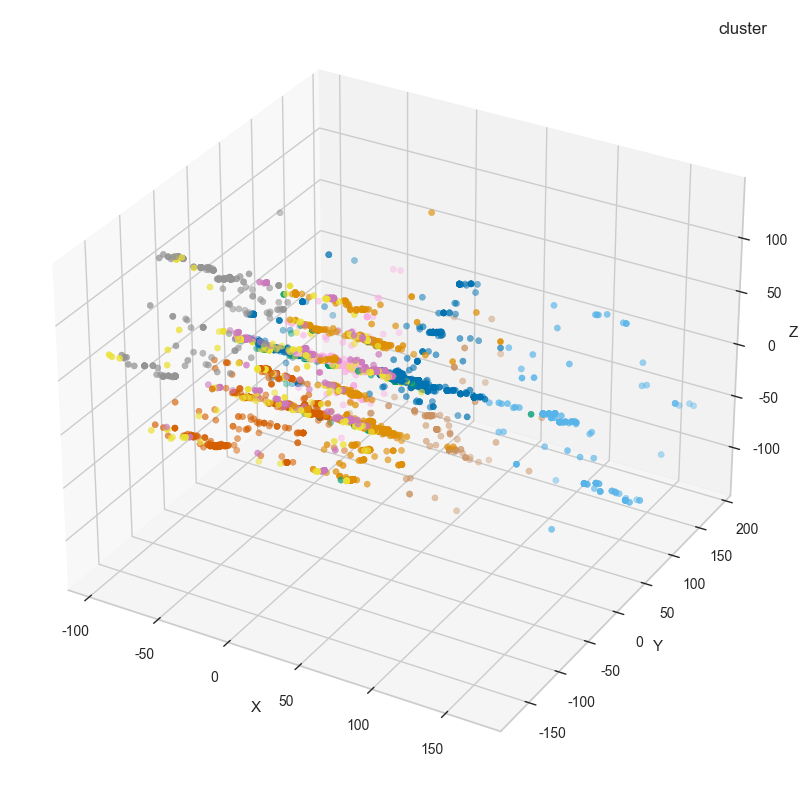

In [130]:
#t-sne 시각화
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
# 라벨을 숫자로 변환
labels, unique = pd.factorize(compl_cluster['cluster'])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# 숫자로 매핑된 라벨을 사용하여 색상을 지정
sc = ax.scatter(compl_cluster['pca1'], compl_cluster['pca2'],compl_cluster['pca3'],
                # 변환된 라벨 사용
                c=labels,  
                # 고유 라벨의 수에 기반한 컬러 팔레트
                cmap=ListedColormap(sns.color_palette("colorblind", n_colors=len(unique))))  

# 레전드 추가 (각 고유 라벨에 대한 설명)
legend1 = ax.legend(*sc.legend_elements(), bbox_to_anchor=(2, 2), loc=2)
ax.add_artist(legend1)

# 축 라벨 설정
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.show()

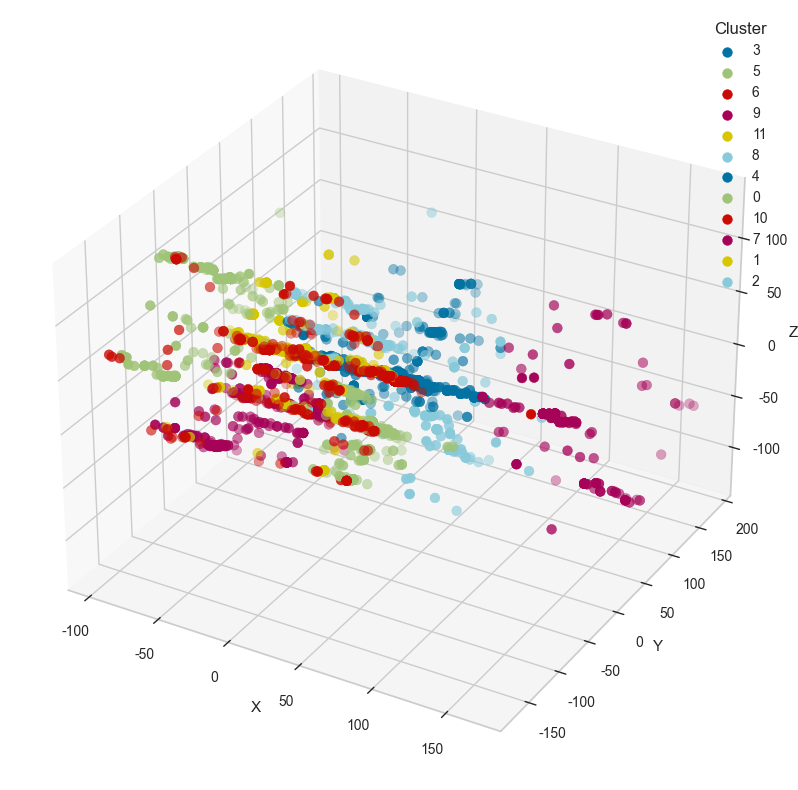

In [131]:
# 라벨을 숫자로 변환하지 않고 직접 사용
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# 고유 클러스터와 색상 매핑
colors = sns.color_palette("hsv", n_colors=compl_cluster['cluster'].nunique())

# 각 클러스터별로 산점도 그리기
for color, label in zip(colors, compl_cluster['cluster'].unique()):
    idx_to_use = compl_cluster['cluster'] == label
    ax.scatter(compl_cluster.loc[idx_to_use, 'pca1'], compl_cluster.loc[idx_to_use, 'pca2'], compl_cluster.loc[idx_to_use, 'pca3'], label=label, s=50)

# 범주 표시
ax.legend(title="Cluster")

# 축 라벨 설정
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.show()

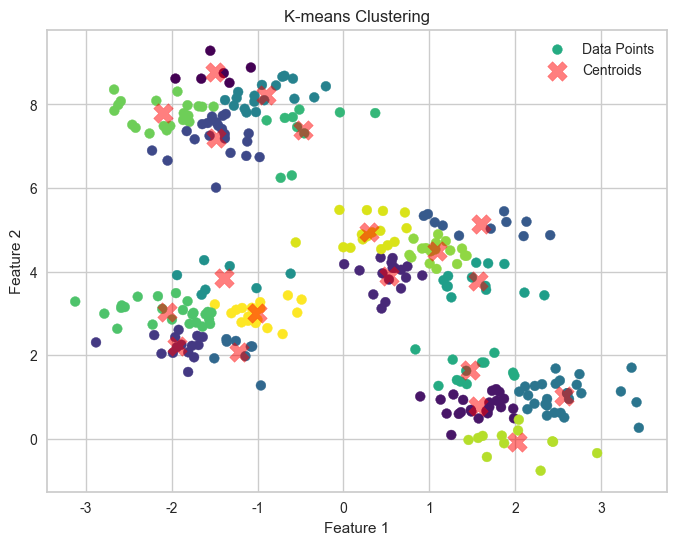

In [96]:
# data_br_scaled가 이미 스케일링된 데이터를 포함하고 있다고 가정합니다.

# 주성분 분석(PCA)을 사용하여 데이터를 2차원으로 축소합니다.
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_br_scaled.drop('cluster', axis=1))  # 'cluster' 칼럼을 제외하고 PCA 적용

# KMeans 클러스터링 수행
kmeans = KMeans(n_clusters=19, random_state=0)
data_br_scaled['cluster'] = kmeans.fit_predict(data_pca)  # PCA 결과에 클러스터링 적용

# 클러스터링 결과와 클러스터 중심을 시각화합니다.
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data_br_scaled['cluster'], s=50, cmap='viridis', label='Data Points')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, marker='X', label='Centroids')

plt.title('K-means Clustering with PCA')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.show()

In [23]:
# K-means++ 로 초기값 지정
kmeans_pp = KMeans(n_clusters=4, random_state=0).fit(scaled_data)

br_centroids_pp = pd.DataFrame(kmeans_pp.cluster_centers_, columns=scaled_data.columns)

c2 = Counter()
c2.update(kmeans_pp.labels_)
label_counts2 = [c2[x] for x in br_centroids_pp.index]
br_centroids_pp['size'] = label_counts2

br_centroids_pp

Review_score  Review_counts     slope     bread  beverage     vegan  \
0      0.775855       0.060983  0.107510  0.561079  0.576106  0.500301   
1      0.784582       0.058922  0.147436  0.966012  0.557593  0.500820   
2      0.696947       0.060013  0.120037  0.458191  0.472332  0.499487   
3      0.786197       0.070428  0.113648  0.642962  0.616935  0.500000   

   no_senior   no_kids       pet  whole_wheat  ...     photo  good_music  \
0   0.500000  0.500181  0.500465     0.334150  ...  0.502705    0.501605   
1   0.500117  0.500117  0.500844     0.334755  ...  0.502297    0.500691   
2   0.499658  0.500445  0.499829     0.333333  ...  0.499761    0.498735   
3   0.500000  0.500733  0.500367     0.333333  ...  0.518695    0.504839   

   reservation_possible  unique_concept  beautiful_interior     price  \
0              0.501117        0.003221            0.333575  0.502932   
1              0.502180        0.001476            0.335083  0.504464   
2              0.498461        0.001505            0.343137  0.431532   
3              0.500733        0.015982            0.804985  0.499927   

       wait    health     sentiment  size  
0  0.498435  0.504994  1.000000e+00  8817  
1  0.498641  0.506802  1.000000e+00  4266  
2  0.477873  0.498871  2.664535e-15  1462  
3  0.495455  0.503922  1.000000e+00   682  

[4 rows x 30 columns]

In [24]:
silhouette_avg = silhouette_score(scaled_data, kmeans_pp.labels_)
silhouette_avg
# 실루엣 지수 : 클러스터링 결과의 타당성을 평가
# 클수록 좋음

0.28748817684861583

In [25]:
#K값에 따른 Silhouette 계수 비교
for k in range(3, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
    print("k = {} -> silhouette index {}".format(k, silhouette_avg))

# 실루엣은 밀도기반
# 클러스터링을 돌리는 하나의 계산 식
# 데이터가 많으면 정확도 안좋음
# 1에 가까울수록 군집 최적화
# 0에 가까울수록 군집이 겹침


k = 3 -> silhouette index 0.267354008556763
k = 4 -> silhouette index 0.28748817684861583
k = 5 -> silhouette index 0.2779805150581696
k = 6 -> silhouette index 0.2679932827357695
k = 7 -> silhouette index 0.27065319516703196
k = 8 -> silhouette index 0.2701789841517067
k = 9 -> silhouette index 0.2738099728914069
k = 10 -> silhouette index 0.24297142951191686


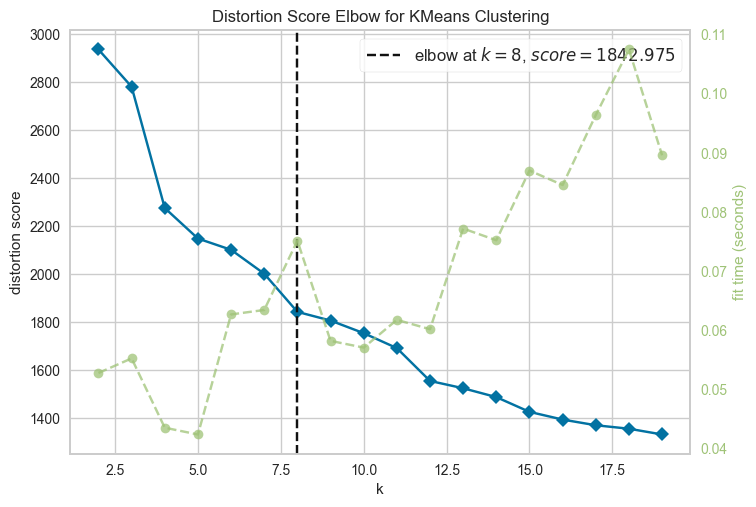

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=19, random_state=9), k=(2, 20))

In [26]:
# 엘보포인트 그려주는 패키지
from yellowbrick.cluster.elbow import kelbow_visualizer

kelbow_visualizer(KMeans(random_state=9), scaled_data, k=(2,20))2
# 훨씬 중요

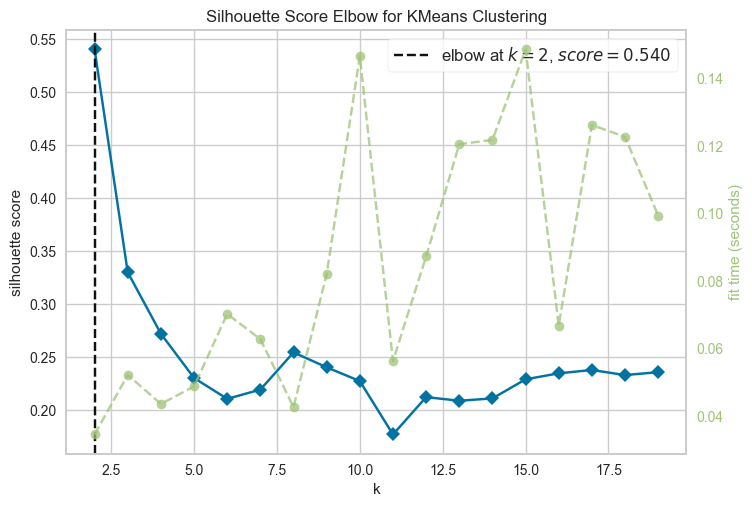

KElbowVisualizer(ax=<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>,
                 estimator=KMeans(n_clusters=19, random_state=9), k=(2, 20),
                 metric='silhouette')

In [27]:
# 메트릭을 실루엣으로 계산
kelbow_visualizer(KMeans(random_state=9), scaled_data, k=(2,20), metric="silhouette")

In [28]:
# 센트로이드 계산
kmeans = KMeans(n_clusters=5, random_state=9).fit(scaled_data)
br_kcentroids = pd.DataFrame(kmeans.cluster_centers_, columns=scaled_data.columns)
br_kcentroids

Review_score  Review_counts     slope     bread  beverage     vegan  \
0      0.786116       0.069207  0.113436  0.643805  0.617404  0.500000   
1      0.696947       0.060013  0.120037  0.458191  0.472332  0.499487   
2      0.773659       0.062824  0.122291  0.572299  0.498977  0.500316   
3      0.783384       0.061366  0.124513  0.985201  0.558840  0.500830   
4      0.785440       0.051756  0.109004  0.557443  0.791632  0.500315   

   no_senior   no_kids       pet  whole_wheat  ...  special_menu     photo  \
0   0.500000  0.500737  0.500369     0.333333  ...  7.374631e-03  0.518805   
1   0.499658  0.500445  0.499829     0.333333  ... -6.071532e-18  0.499761   
2   0.500000  0.500368  0.500456     0.334432  ...  8.373804e-04  0.502708   
3   0.500128  0.500000  0.500792     0.334798  ...  1.796117e-03  0.502632   
4   0.500000  0.499832  0.500631     0.333361  ...  8.830950e-04  0.502082   

   good_music  reservation_possible  unique_concept  beautiful_interior  \
0    0.504867              0.500737        0.016077            0.805900   
1    0.498735              0.498461        0.001505            0.343137   
2    0.501082              0.501575        0.003341            0.333608   
3    0.500754              0.502069        0.001354            0.335224   
4    0.502860              0.500147        0.002817            0.334006   

      price      wait    health     sentiment  
0  0.499926  0.495428  0.503945  1.000000e+00  
1  0.431532  0.477873  0.498871  2.664535e-15  
2  0.502354  0.498705  0.505873  1.000000e+00  
3  0.504765  0.498505  0.507224  1.000000e+00  
4  0.504310  0.497918  0.502050  1.000000e+00  

[5 rows x 29 columns]

In [29]:
def plot_radar_from_centroid(df_centroids):
  fig = go.Figure()
  categories = df_centroids.columns
  for row in df_centroids.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=row[1].tolist(),
        theta=categories,
        fill='toself',
        name='cluster {}'.format(row[0])
    ))

  fig.update_layout(
      autosize=False,
      width=1000,
      height=800,
  )
  fig.show()

In [30]:
# 방사형 그래프
# 스케일링된 값을 이용한 것이라서 절대적이다고 판단하지 말것
plot_radar_from_centroid(br_kcentroids)

In [77]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
h_clustering = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward').fit(scaled_data)
h_silhouette_avg = silhouette_score(scaled_data, h_clustering.labels_)
k_silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
print("Silhouette\n* hierarchical : {}\n* kmeans : {}".format(h_silhouette_avg, k_silhouette_avg))

## DBSCAN

In [32]:
from sklearn.cluster import DBSCAN

In [36]:
dbscan = DBSCAN(eps=0.1, min_samples=4).fit(scaled_data)
y_pred = dbscan.labels_

In [49]:
# scatter_plot_2d_with_label(scaled_data, y_pred, title = "DBSCAN- bread")

def scatter_plot_2d_with_label(scaled_data, labels, title="DBSCAN- bread"):
    fig = go.Figure()
    for label in set(labels):
        # 해당 label에 해당하는 데이터만 추출
        filtered_df = scaled_data[labels == label]
        x_data = filtered_df.iloc[:, 0]  # 첫 번째 열 선택
        y_data = filtered_df.iloc[:, 1]  # 두 번째 열 선택
        
        fig.add_trace(go.Scatter(x=x_data, y=y_data, mode='markers', name=str(label_br)))
    
    fig.update_layout(title=title)
    fig.show()

In [39]:
from sklearn.neighbors import NearestNeighbors
#minPts 값을 K로 설정
neighbors = NearestNeighbors(n_neighbors=4).fit(data_br) 
distances, indices = neighbors.kneighbors(data_br)

In [51]:
#k번째 이웃과의 거리를 가져옴
distances = np.sort(distances, axis=0)[:,-1] 

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [50]:
distances[:5]

array([0., 0., 0., 0., 0.])

<Axes: >

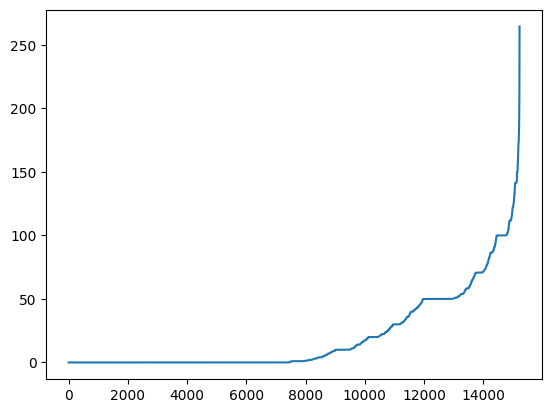

In [45]:
sns.lineplot(distances)